### 1. Импорт библиотек и настройка

In [ ]:
# Importing the required libraries for data analysis, logging, and operations
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Config and database access
import ai
import config
import database as db
import productRepository as rep

### 2. Загрузка категорий товаров

In [ ]:
# Вызываем метод из репозитория, если категория пустая или отсутствует
# rep.fetch_categories_to_csv(config.row_categories)

# Чтение данных о категориях из CSV
row_categories = pd.read_csv(config.row_categories)

# Посмотрим на несколько последних строк
row_categories.tail()

,Category ID,Category,Subcategory ID,Subcategory
416,73C9953,Аптечка,73C9955,Презервативы и гели
417,73C9953,Аптечка,73C9956,Пластыри
418,73C9953,Аптечка,73C9957,Кремы
419,73C9953,Аптечка,73C9959,Гигиенические помады
420,73C9953,Аптечка,73C12099,"Витамины, БАДы"


### 3. Фильтрация категорий (оставляем только пищевые категории)

In [ ]:
# Создаем список категорий, которые не имеют отношения к пище
drop_categories = [
    "Новый Год", "Не забудьте купить", "Детские товары", "Детское питание", "Детский клуб",
    "Бумага и салфетки", "Красота и гигиена", "Л'Этуаль в Пятёрочке", "Для животных", "Пушистый клуб",
    "Стирка и уборка", "Одежда", "Для дома и дачи", "Аптечка"
]

# Функция для фильтрации категорий товаров
def filter_categories(input_file=config.row_categories, output_file=config.categories):
    try:
        # Загружаем исходный файл категорий
        categories = pd.read_csv(input_file)

        # Оставляем только те категории, которые не в списке исключений
        filtered_categories = categories[~categories['Category'].isin(drop_categories)]

        # Сохраняем отфильтрованные категории в новый файл
        filtered_categories.to_csv(output_file, index=False)

    except Exception as e:
        logging.error(f"Failed to filter categories: {e}")

# Вызовем функцию фильтрации
filter_categories()

### 4. Просмотр отфильтрованных категорий

In [ ]:
# Загружаем и выводим несколько строк отфильтрованных категорий
categories = pd.read_csv(config.categories)
categories.head()

,Category ID,Category,Subcategory ID,Subcategory
0,73C2338,Готовая еда,73C10301,Горячие напитки
1,73C2338,Готовая еда,73C9714,"Блинчики, сырники и каши"
2,73C2338,Готовая еда,73C9715,Сэндвичи и бургеры
3,73C2338,Готовая еда,73C6771,Суши и роллы
4,73C2338,Готовая еда,73C9718,Основные блюда


### 5. Загрузка товаров (если данных нет)

In [ ]:
# В случае отсутствия товаров, вызываем метод для их загрузки
# rep.process_products_flow(config.categories, config.row_products)

# Загружаем данные о товарах
row_products = pd.read_csv(config.row_products)

# Просмотр первых строк данных
row_products.head()

,plu,name,image_links,uom,step,rating,promo,prices,labels,property_clarification,has_age_restriction,stock_limit,description,description_md,nutrients,attributes,ingredients,is_available,is_various_manufacturers,desirability
0,4103219,Хлеб Сибирский пекарь зерновой мультизлаковый ...,{'small': ['https://photos.okolo.app/product/1...,шт,1.0,"{'rating_average': 4.9, 'rates_count': 5389}",NaN,"[{'value': '65.99', 'placement_type': 'regular...",NaN,280 г,False,25.00,NaN,NaN,"[{'value': '6.2', 'text': 'белки'}, {'value': ...","[{'name': 'Вес', 'value': '0.28', 'uom': 'кг'}...","вода, ржаная мука, ржаные хлопья, пшеничные хл...",True,False,5
1,78034284,Кофе Большой Американо 230мл,{'small': ['https://photos.okolo.app/product/1...,шт,1.0,"{'rating_average': 4.81, 'rates_count': 208}",{'econombo': {'include_categories': ['251C2161...,"[{'value': '49.99', 'placement_type': 'regular...","[{'label': 'Комбо', 'bg_color': '#FBAC29', 'te...",230 мл,False,100.00,NaN,NaN,"[{'value': '0.41', 'text': 'белки'}, {'value':...","[{'name': 'Вес', 'value': '0.23', 'uom': 'кг'}...","вода питьевая, кофе натуральный жареный в зернах",True,True,1
2,4200588,Булочка с корицей замороженная п/ф 90г,{'small': ['https://photos.okolo.app/product/1...,шт,1.0,"{'rating_average': 4.81, 'rates_count': 352}",NaN,"[{'value': '39.99', 'placement_type': 'regular...","[{'label': 'Заморозка', 'icon_url': None, 'bg_...",90 г,False,70.00,Рекомендуемый способ приготовления: не размора...,Рекомендуемый способ приготовления: не размора...,"[{'value': '5.5', 'text': 'белки'}, {'value': ...","[{'name': 'Вес', 'value': '0.09', 'uom': 'кг'}...","Мука пшеничная хлебопекарная высшего сорта, ма...",True,False,2
3,50911,Груши Конференция,{'small': ['https://photos.okolo.app/product/1...,кг,0.5,"{'rating_average': 4.9, 'rates_count': 42257}",NaN,"[{'value': '299.99', 'placement_type': 'regula...","[{'label': 'Выгодно', 'icon_url': None, 'bg_co...",Цена за 1 кг,False,9.77,"Плоды вытянутой формы имеют зеленую кожицу, по...","Плоды вытянутой формы имеют зеленую кожицу, по...","[{'value': '0.4', 'text': 'белки'}, {'value': ...","[{'name': 'Вес', 'value': '1.0', 'uom': 'кг'},...",груша конференция,True,True,8
4,4308912,Рулетики из ветчины с сыром Пятерочка Кафе 150г,{'small': ['https://photos.okolo.app/product/1...,шт,1.0,"{'rating_average': 4.86, 'rates_count': 4683}",NaN,"[{'value': '159.99', 'placement_type': 'regula...",NaN,150 г,False,4.00,NaN,NaN,"[{'value': '13.1', 'text': 'белки'}, {'value':...","[{'name': 'Вес', 'value': '0.15', 'uom': 'кг'}...","ветчина из мяса птицы [филе индейки, филе кури...",True,True,3


### 6. Руками размечаем сабкатегории

### 7. Удалить дубликаты продуктов

In [ ]:
data = pd.read_csv(config.row_products)

data_cleaned = data.drop_duplicates(subset='plu', keep='first')

data_cleaned.to_csv(config.row_products, index=False)

### 8. Фильтрация полей продуктов (удаляем ненужные)

In [ ]:
# Список полей, которые нам не нужны для анализа
drop_fields = [
    "image_links", "promo", "labels", "has_age_restriction", "stock_limit", "description",
    "description_md", "attributes", "is_available", "is_various_manufacturers"
]

# Функция для удаления ненужных полей
def filter_product_fields(input_file=config.row_products, output_file=config.products):
    try:
        # Чтение продуктов
        products = pd.read_csv(input_file)

        # Удаление лишних колонок
        filtered_products = products.drop(columns=drop_fields, errors='ignore')

        # Сохранение очищенных данных
        filtered_products.to_csv(output_file, index=False)
        logging.info(f"Filtered products saved to {output_file}")

    except Exception as e:
        logging.error(f"Failed to filter product fields: {e}")

# Вызываем функцию для очистки данных
filter_product_fields()

### 9. Просмотр очищенных данных

In [ ]:
# Загружаем и просматриваем очищенные данные
products = pd.read_csv(config.products)
products.head()

,plu,name,uom,step,rating,prices,property_clarification,nutrients,ingredients,desirability
0,4103219,Хлеб Сибирский пекарь зерновой мультизлаковый ...,шт,1.0,"{'rating_average': 4.9, 'rates_count': 5389}","[{'value': '65.99', 'placement_type': 'regular...",280 г,"[{'value': '6.2', 'text': 'белки'}, {'value': ...","вода, ржаная мука, ржаные хлопья, пшеничные хл...",5
1,78034284,Кофе Большой Американо 230мл,шт,1.0,"{'rating_average': 4.81, 'rates_count': 208}","[{'value': '49.99', 'placement_type': 'regular...",230 мл,"[{'value': '0.41', 'text': 'белки'}, {'value':...","вода питьевая, кофе натуральный жареный в зернах",1
2,4200588,Булочка с корицей замороженная п/ф 90г,шт,1.0,"{'rating_average': 4.81, 'rates_count': 352}","[{'value': '39.99', 'placement_type': 'regular...",90 г,"[{'value': '5.5', 'text': 'белки'}, {'value': ...","Мука пшеничная хлебопекарная высшего сорта, ма...",2
3,50911,Груши Конференция,кг,0.5,"{'rating_average': 4.9, 'rates_count': 42257}","[{'value': '299.99', 'placement_type': 'regula...",Цена за 1 кг,"[{'value': '0.4', 'text': 'белки'}, {'value': ...",груша конференция,8
4,4308912,Рулетики из ветчины с сыром Пятерочка Кафе 150г,шт,1.0,"{'rating_average': 4.86, 'rates_count': 4683}","[{'value': '159.99', 'placement_type': 'regula...",150 г,"[{'value': '13.1', 'text': 'белки'}, {'value':...","ветчина из мяса птицы [филе индейки, филе кури...",3


### 10. Сохранение очищенных данных в базу

In [ ]:
# Сохраняем данные в базу
db.save_filtered_products(config.products, config.processed_products)

# Загружаем обработанные продукты для дальнейшего анализа
processed_products = pd.read_csv(config.processed_products)
processed_products.head()

,Product Name,PLU,UOM,Step,Rating,Rates Count,Price,Property Clarification,Weight,Nutrients Protein,Nutrients Fat,Nutrients Carbs,Nutrients Calories,Ingredients,Desirability
0,Хлеб Сибирский пекарь зерновой мультизлаковый ...,4103219,шт,1.0,4.90,5389,65.99,280 г,280.0,6.20,2.30,48.90,228.00,"вода, ржаная мука, ржаные хлопья, пшеничные хл...",5
1,Кофе Большой Американо 230мл,78034284,шт,1.0,4.81,208,49.99,230 мл,230.0,0.41,0.42,0.09,5.78,"вода питьевая, кофе натуральный жареный в зернах",1
2,Булочка с корицей замороженная п/ф 90г,4200588,шт,1.0,4.81,352,39.99,90 г,90.0,5.50,27.00,45.00,450.00,"Мука пшеничная хлебопекарная высшего сорта, ма...",2
3,Груши Конференция,50911,кг,0.5,4.90,42257,299.99,Цена за 1 кг,500.0,0.40,0.30,10.30,47.00,груша конференция,8
4,Рулетики из ветчины с сыром Пятерочка Кафе 150г,4308912,шт,1.0,4.86,4683,159.99,150 г,150.0,13.10,27.80,3.20,315.00,"ветчина из мяса птицы [филе индейки, филе кури...",3


### 11. Статистический анализ (описательные статистики)

In [ ]:
# Выполняем описательную статистику по очищенным данным
processed_products.describe()

,PLU,Step,Rating,Rates Count,Price,Weight,Nutrients Protein,Nutrients Fat,Nutrients Carbs,Nutrients Calories,Desirability
count,3.438000e+03,3438.000000,3438.000000,3438.000000,2471.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000,3438.000000
mean,4.768185e+06,0.973691,4.886649,7903.533450,152.338960,352.461896,6.522411,12.293496,26.668566,243.926056,3.686736
std,9.497339e+06,0.167731,0.065504,17192.882968,157.494612,421.709696,7.147753,18.521746,28.060688,192.754671,2.172354
min,2.500000e+01,0.100000,4.160000,13.000000,4.990000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.433858e+06,1.000000,4.870000,2353.250000,65.990000,100.000000,0.600000,0.200000,3.000000,62.850000,2.000000
50%,4.057690e+06,1.000000,4.910000,4927.500000,109.990000,220.000000,5.000000,5.000000,12.000000,230.000000,3.000000
75%,4.291328e+06,1.000000,4.930000,8732.750000,179.990000,438.250000,9.500000,19.000000,53.000000,376.750000,5.000000
max,7.803565e+07,3.200000,5.000000,404532.000000,2299.000000,5000.000000,87.000000,483.000000,100.000000,2145.000000,10.000000


### 12. Визуализация распределения весов продуктов

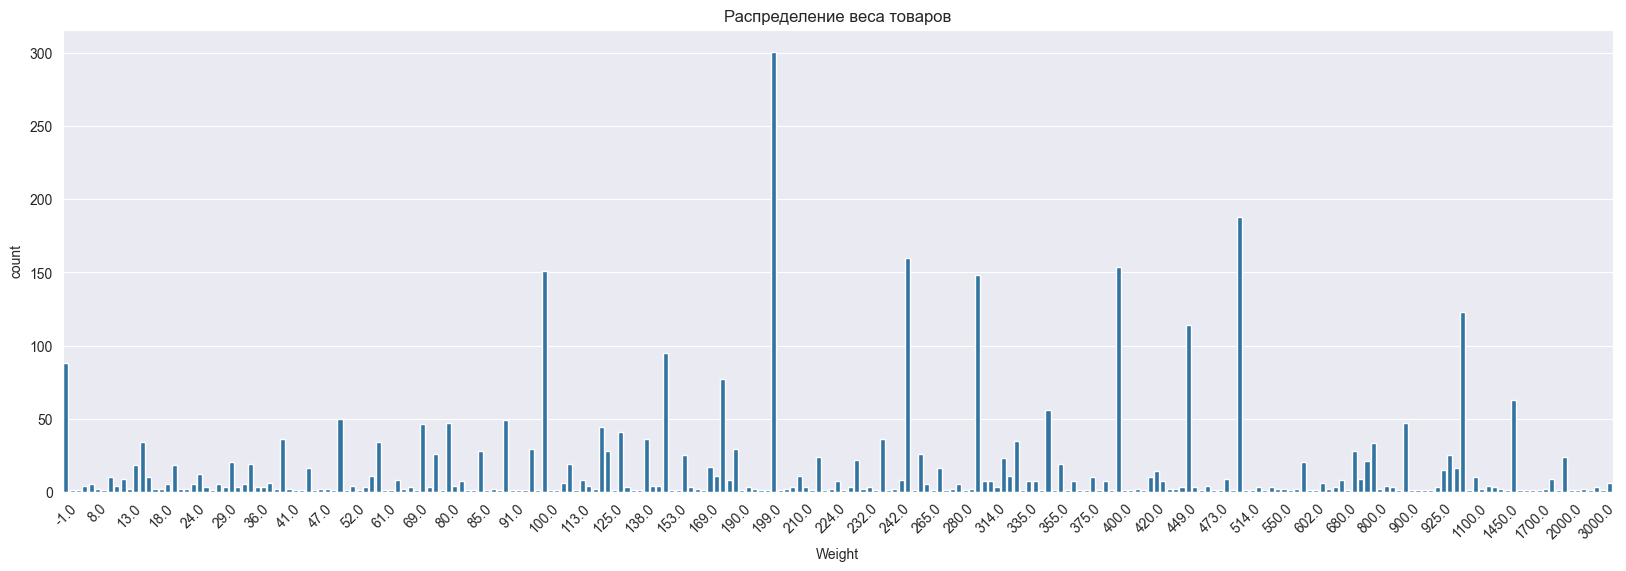

In [ ]:
# Построим график распределения по весам для анализа
plt.figure(figsize=(20, 6))
sns.countplot(x='Weight', data=processed_products)
plt.title('Распределение веса товаров')

# Задаем интервал для меток по оси X, чтобы они не перекрывались
ticks = plt.gca().get_xticks()  # Получаем текущие метки по оси X
step = 5  # Шаг меток
plt.xticks(ticks[::step], rotation=45)  # Показываем метки через определенный шаг

plt.show()

In [ ]:
processed_products.Weight.value_counts()

Weight
200.0     301
500.0     188
250.0     160
400.0     154
100.0     151
         ... 
3200.0      1
43.0        1
398.0       1
1600.0      1
473.0       1
Name: count, Length: 243, dtype: int64

### 13. Оценить продукты с помощью GigaChat

In [ ]:
ai.process_products_flow(config.processed_products, config.products_with_scores)

In [ ]:
products_with_scores = pd.read_csv(config.products_with_scores)
products_with_scores.head()

,Product Name,PLU,UOM,Step,Rating,Rates Count,Price,Property Clarification,Weight,Nutrients Protein,Nutrients Fat,Nutrients Carbs,Nutrients Calories,Desirability,Score
0,Кофе Латте 330мл,78034281,шт,1.0,4.73,2248,99.99,330 мл,330.0,6.84,6.85,9.65,127.61,1,7.67
1,Каша Рисовая на молоке Пятерочка Кафе 200г,4216695,шт,1.0,4.92,9545,94.99,200 г,200.0,2.50,3.00,15.00,95.00,4,7.00
2,Сэндвич куриный с беконом Пятерочка Кафе 185г,4344431,шт,1.0,4.84,5505,179.99,185 г,185.0,8.10,16.20,21.60,264.00,3,6.00
3,Кофе Большой Капучино 270мл,78034282,шт,1.0,4.68,1261,99.99,270 мл,270.0,5.25,5.26,7.17,97.02,1,6.33
4,Каша пшенная на молоке Пятерочка Кафе 200г,4260436,шт,1.0,4.89,4923,89.99,200 г,200.0,3.00,3.00,13.00,95.00,4,7.00


Saving products_with_scores.csv to products_with_scores (1).csv
Количество строк до удаления дубликатов: 2135
Количество строк после удаления дубликатов: 2130
Очищенный файл сохранён в: /content/products_with_scores_cleaned.csv


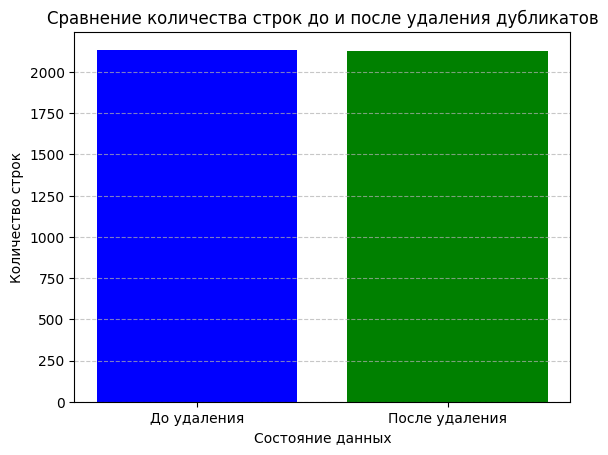

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

# Чтение данных из CSV
file_path = '/content/products_with_scores.csv'
df = pd.read_csv(file_path)

df_cleaned=df.drop_duplicates ()

# Проверка, удалились ли дубликаты
print(f"Количество строк до удаления дубликатов: {len(df)}")
print(f"Количество строк после удаления дубликатов: {len(df_cleaned)}")

output_file_path = '/content/products_with_scores_cleaned.csv'
df_cleaned.to_csv(output_file_path, index=False)

# Подсчёт количества строк до и после
rows_before = len(df)
rows_after = len(df_cleaned)

# Сохранение очищенного DataFrame в файл .csv
output_file_path = '/content/products_with_scores_cleaned.csv'
df_cleaned.to_csv(output_file_path, index=False)

print(f"Очищенный файл сохранён в: {output_file_path}")

# Построение графика
plt.bar(['До удаления', 'После удаления'], [rows_before, rows_after], color=['blue', 'green'])
plt.title('Сравнение количества строк до и после удаления дубликатов')
plt.ylabel('Количество строк')
plt.xlabel('Состояние данных')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

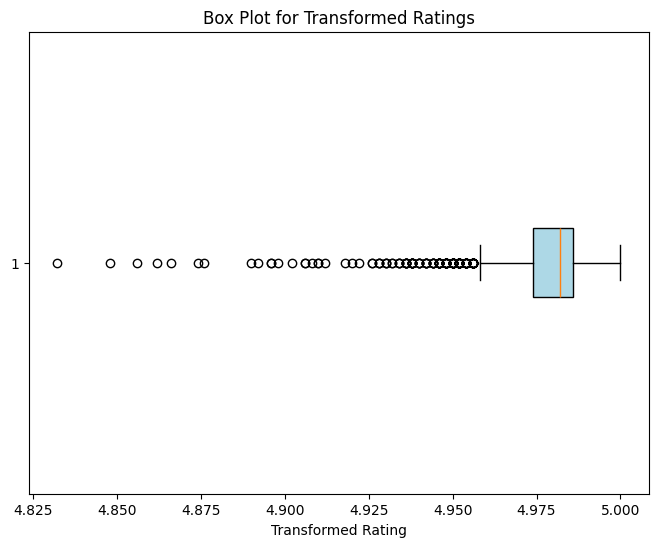

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/products_with_scores_cleaned.csv'
data = pd.read_csv(file_path)

# Убедимся, что столбцы Rating и Rates Count существуют
if 'Rating' not in data.columns or 'Rates Count' not in data.columns:
    raise ValueError("Столбцы 'Rating' и/или 'Rates Count' отсутствуют в CSV файле.")

# Проверяем, что значения Rating находятся в диапазоне от 0 до 5
if not data['Rating'].between(0, 5).all():
    raise ValueError("Некоторые значения в 'Rating' выходят за пределы диапазона 0-5.")

# Преобразование значений из диапазона [0, 5] в [4, 5]
data['Transformed Rating'] = 4 + (data['Rating'] / 5)

# Вычисление веса каждой оценки на основе Rates Count
data['Rating Weight'] = data['Rates Count'] / data['Rates Count'].sum()

# Сохранение преобразованных данных (если необходимо)
data.to_csv('transformed_data.csv', index=False)

# Построение box plot для анализа нового столбца Transformed Rating
plt.figure(figsize=(8, 6))
plt.boxplot(data['Transformed Rating'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot for Transformed Ratings')
plt.xlabel('Transformed Rating')
plt.show()




Интерпретация:  
Центральное положение (медиана): Указывает, где находится середина нормализованных оценок.  
Диапазон данных: Показывает, насколько значения рейтинга близки друг к другу или разбросаны.  
Выбросы: Выявляет отдельные значения, которые выделяются из общего распределения.  
Если график симметричен и усы короткие, это говорит о равномерности распределения. Если ящик смещен или присутствует множество выбросов, это указывает на смещение в данных или необычные значения.

Можно заявить, что представленные на сайте Пятёрочки оценки пользователей не являются релевантными и не могут служить оценкой качества конкретного продукта

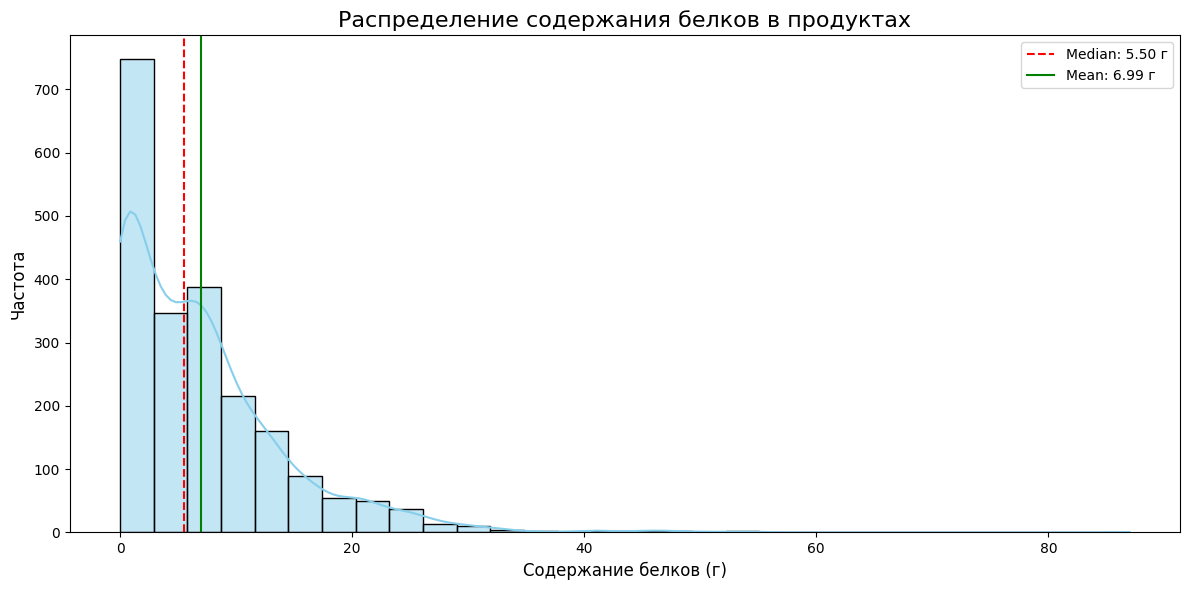

Описание распределения данных для столбца 'Nutrients Protein':
Среднее значение: 6.99 г
Медиана: 5.50 г
Минимальное значение: 0.00 г
Максимальное значение: 87.00 г
Стандартное отклонение: 7.46 г


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned.csv'
df = pd.read_csv(file_path)

# Построение графика распределения
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['Nutrients Protein'], kde=True, bins=30, color='skyblue')

# Вычисление медианы и среднего значения
median_value = df_cleaned['Nutrients Protein'].median()
mean_value = df_cleaned['Nutrients Protein'].mean()

# Добавление медианы на график
plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axvline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('Распределение содержания белков в продуктах', fontsize=16)
plt.xlabel('Содержание белков (г)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Protein':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_cleaned['Nutrients Protein'].min():.2f} г")
print(f"Максимальное значение: {df_cleaned['Nutrients Protein'].max():.2f} г")
print(f"Стандартное отклонение: {df_cleaned['Nutrients Protein'].std():.2f} г")


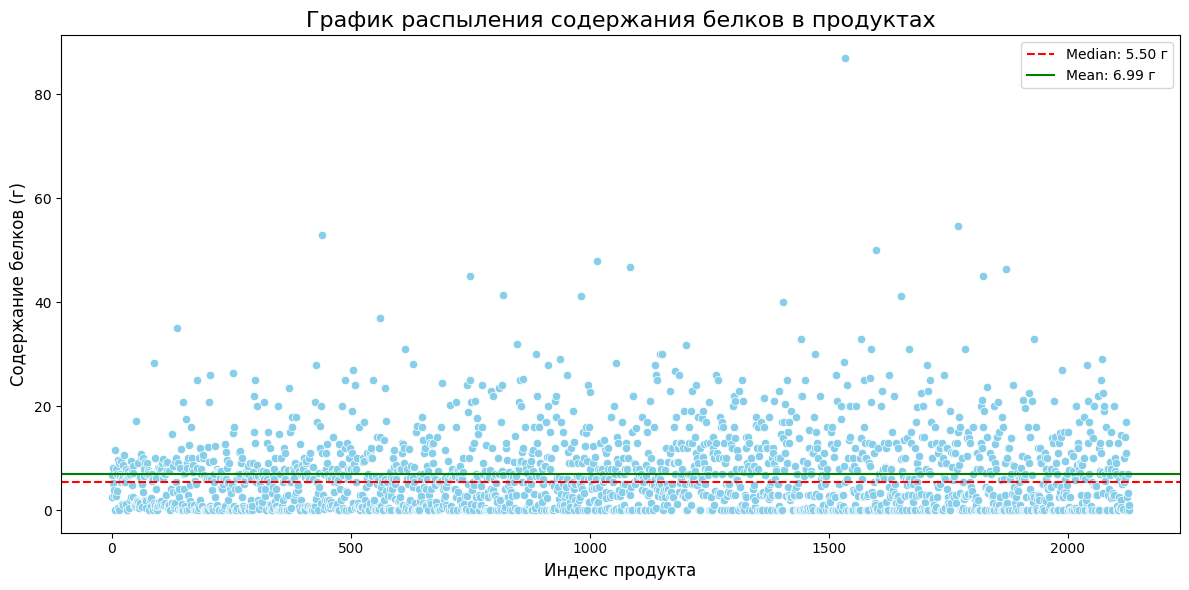

Описание распределения данных для столбца 'Nutrients Protein':
Среднее значение: 6.99 г
Медиана: 5.50 г
Минимальное значение: 0.00 г
Максимальное значение: 87.00 г
Стандартное отклонение: 7.46 г


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned.csv'
df = pd.read_csv(file_path)

# Убираем строки с некорректными значениями (если есть NaN)
df_clean = df.dropna(subset=['Nutrients Protein'])

# Построение графика распыления
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_clean.index, y=df_clean['Nutrients Protein'], color='skyblue')

# Добавление медианы и среднего значения на график
median_value = df_clean['Nutrients Protein'].median()
mean_value = df_clean['Nutrients Protein'].mean()

# Медиана и среднее как горизонтальные линии
plt.axhline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axhline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('График распыления содержания белков в продуктах', fontsize=16)
plt.xlabel('Индекс продукта', fontsize=12)
plt.ylabel('Содержание белков (г)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Protein':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Protein'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Protein'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Protein'].std():.2f} г")


In [8]:
products_above_40 = df_clean[df_clean['Nutrients Protein'] > 40]

# Выводим имена продуктов с содержанием белка больше 40
print("Продукты с содержанием белков выше 40 г:")
print(products_above_40['Product Name'])

Продукты с содержанием белков выше 40 г:
440     Мини-кексы Юбилейное с кусочками молочного шок...
750     Мясной продукт Мясо так мясо Слайсы классическ...
819        Полосатик Fish House желтый сушено-вяленый 40г
981     Соломка рыбная Флотская со вкусом стейка солен...
1016             Дрожжи Angel сухие быстродействующие 11г
1085       Минтай Fish House вяленый соломка c перцем 70г
1535                         Желатин Рестория пищевой 10г
1600                       Ставридка Сухогруз сушеная 70г
1651    Соломка рыбная Флотская Васаби солено-сушеная 15г
1770           Анчоус Тиксы столефорус сушено-вяленый 36г
1824                       Лещ Царский Посол вяленый 300г
1871          Вобла Fish House вяленая неразделанная 200г
Name: Product Name, dtype: object


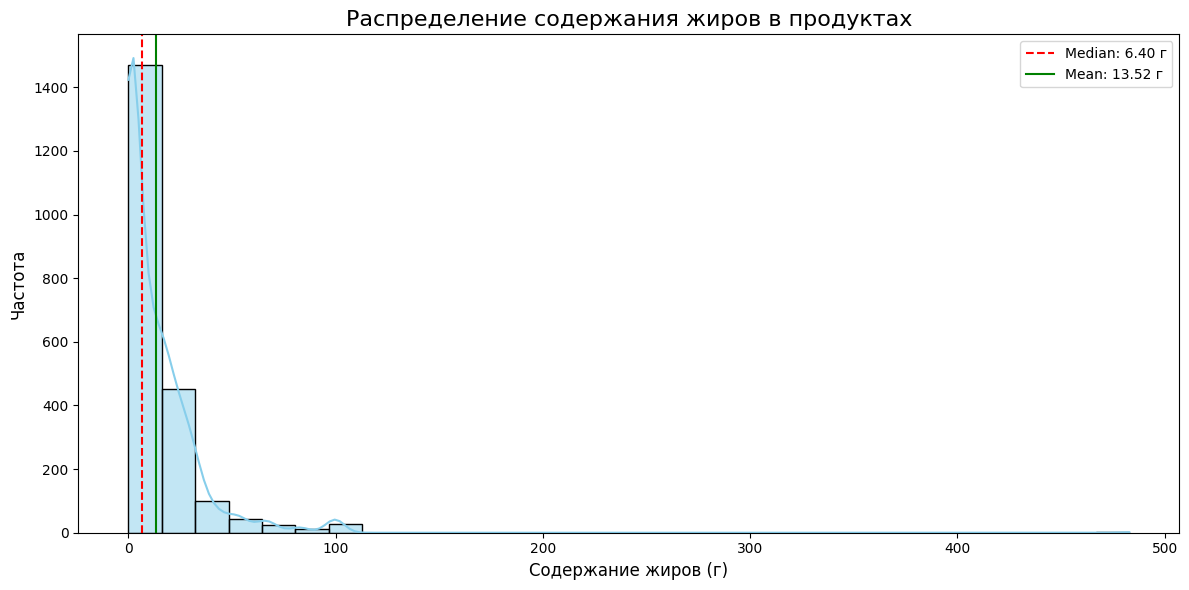

Описание распределения данных для столбца 'Nutrients Fat':
Среднее значение: 13.52 г
Медиана: 6.40 г
Минимальное значение: 0.00 г
Максимальное значение: 483.00 г
Стандартное отклонение: 20.74 г


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned.csv'
df = pd.read_csv(file_path)

# Построение графика распределения
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Nutrients Fat'], kde=True, bins=30, color='skyblue')

# Вычисление медианы и среднего значения
median_value = df_clean['Nutrients Fat'].median()
mean_value = df_clean['Nutrients Fat'].mean()

# Добавление медианы на график
plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axvline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('Распределение содержания жиров в продуктах', fontsize=16)
plt.xlabel('Содержание жиров (г)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Fat':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Fat'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Fat'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Fat'].std():.2f} г")

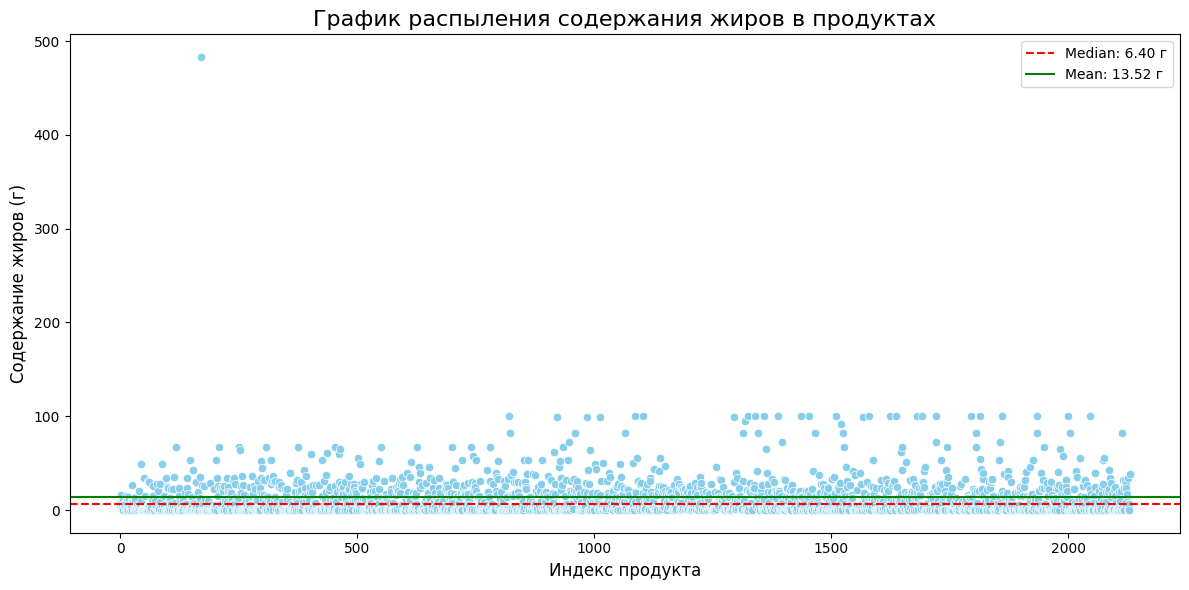

Описание распределения данных для столбца 'Nutrients Fat':
Среднее значение: 13.52 г
Медиана: 6.40 г
Минимальное значение: 0.00 г
Максимальное значение: 483.00 г
Стандартное отклонение: 20.74 г


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned.csv'
df = pd.read_csv(file_path)

# Убираем строки с некорректными значениями (если есть NaN)
df_clean = df.dropna(subset=['Nutrients Fat'])

# Построение графика распыления
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_clean.index, y=df_clean['Nutrients Fat'], color='skyblue')

# Добавление медианы и среднего значения на график
median_value = df_clean['Nutrients Fat'].median()
mean_value = df_clean['Nutrients Fat'].mean()

# Медиана и среднее как горизонтальные линии
plt.axhline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axhline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('График распыления содержания жиров в продуктах', fontsize=16)
plt.xlabel('Индекс продукта', fontsize=12)
plt.ylabel('Содержание жиров (г)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Fat':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Fat'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Fat'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Fat'].std():.2f} г")

In [11]:
products_above_90 = df_clean[df_clean['Nutrients Fat'] > 90]

# Выводим имена продуктов с содержанием жиров больше 90
print("Продукты с содержанием жиров выше 90 г:")
print(products_above_90['Product Name'])

products_above_300 = df_clean[df_clean['Nutrients Fat'] > 300]

# Выводим имена продуктов с содержанием жиров больше 300
print("Продукты с содержанием жиров выше 300 г:")
print(products_above_300['Product Name'])

Продукты с содержанием жиров выше 90 г:
170                Конфеты Raffaello Миндаль и кокос 150г
820     Масло Вкус & Польза кунжутное нерафинированное...
922     Масло Вкус & Польза авокадо нерафинированное х...
985        Масло топленое ГХИ Вкус & Польза 99% БЗМЖ 140г
1012    Масло Вкус & Польза из семян тыквенной семечки...
1087    Масло Вкус & Польза кокосовое нерафинированное...
1102    Масло подсолнечное Слобода рафинированное дезо...
1294       Масло льняное Селяночка нерафинированное 250мл
1319          Сало Золотой Кабанчик По-деревенски соленое
1325    Масло растительное Сарепта Горчичное нерафинир...
1339    Масло оливковое Olivea Extra Virgin нерафиниро...
1340                        Масло Delicato кокосовое 200г
1357    Масло Altrero Almond подсолнечное рафинированн...
1387      Масло оливковое Filippo Berio Extra Virgin 0.5л
1436    Масло Global Village виноградное рафинированно...
1452    Масло Global Village оливковое рафинированное ...
1509    Масло Global Village Sel

Обнаружен вброс по содержанию жиров в продукте Конфеты Raffaello Миндаль и кокс 150 г

In [12]:
import pandas as pd

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned.csv'  # Укажите путь к вашему файлу
df = pd.read_csv(file_path)

# Проверка, что столбцы 'Product Name' и 'Nutrients Fat' существуют
if 'Product Name' in df.columns and 'Nutrients Fat' in df.columns:

    # Находим индекс строки, где 'Product Name' равен 'Конфеты Raffaello Миндаль и кокос 150г'
    product_name = 'Конфеты Raffaello Миндаль и кокос 150г'

    # Изменяем значение в столбце 'Nutrients Fat' для найденного продукта
    df.loc[df['Product Name'] == product_name, 'Nutrients Fat'] = 23

    # Проверка значений в столбце 'Nutrients Fat' и замена значений больше 300 на None
    if (df['Nutrients Fat'] > 300).any():
        print("Внимание! В столбце 'Nutrients Fat' найдены значения выше 300. Они будут заменены на None.")
        df.loc[df['Nutrients Fat'] > 300, 'Nutrients Fat'] = None  # Можно также заменить на другие значения, если нужно

    # Проверяем изменения
    updated_row = df[df['Product Name'] == product_name]
    print("Обновленная информация для продукта:")
    print(updated_row)

    # Сохранение обновленного DataFrame в файл CSV
    output_file_path = '/content/products_with_scores_cleaned_updated.csv'
    df.to_csv(output_file_path, index=False)

    print(f"Обновленный файл сохранен в: {output_file_path}")
else:
    print("Один из столбцов не найден в файле.")



Обновленная информация для продукта:
                               Product Name    PLU UOM  Step  Rating  \
170  Конфеты Raffaello Миндаль и кокос 150г  18162  шт   1.0    4.95   

     Rates Count   Price Property Clarification  Weight  Nutrients Protein  \
170         7708  299.99                  150 г   150.0                7.4   

     Nutrients Fat  Nutrients Carbs  Nutrients Calories  Desirability  Score  
170           23.0             38.6               627.0             2   3.33  
Обновленный файл сохранен в: /content/products_with_scores_cleaned_updated.csv


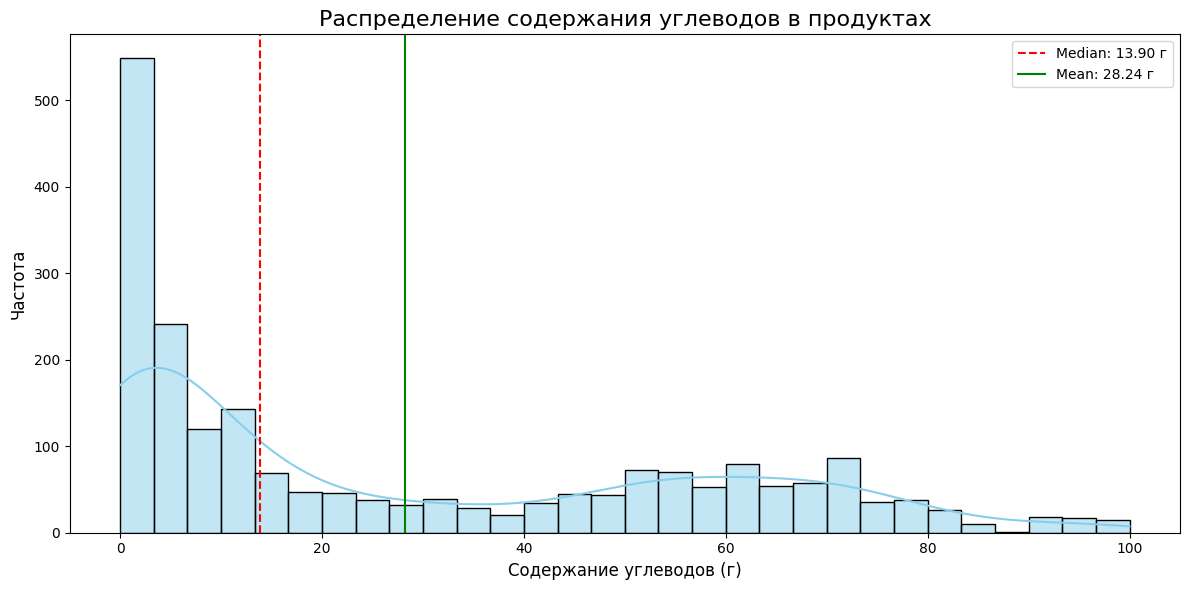

Описание распределения данных для столбца 'Nutrients Carbs':
Среднее значение: 28.24 г
Медиана: 13.90 г
Минимальное значение: 0.00 г
Максимальное значение: 100.00 г
Стандартное отклонение: 28.71 г


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned_updated.csv'
df = pd.read_csv(file_path)

# Построение графика распределения
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['Nutrients Carbs'], kde=True, bins=30, color='skyblue')

# Вычисление медианы и среднего значения
median_value = df_clean['Nutrients Carbs'].median()
mean_value = df_clean['Nutrients Carbs'].mean()

# Добавление медианы на график
plt.axvline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axvline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('Распределение содержания углеводов в продуктах', fontsize=16)
plt.xlabel('Содержание углеводов (г)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Carbs':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Carbs'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Carbs'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Carbs'].std():.2f} г")

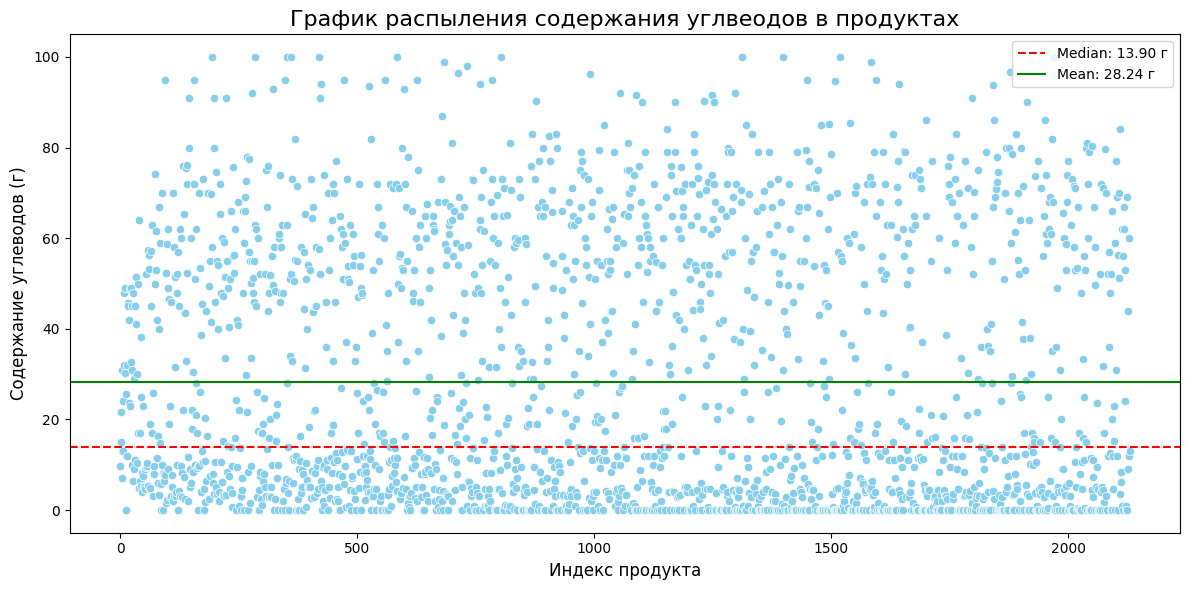

Описание распределения данных для столбца 'Nutrients Carbs':
Среднее значение: 28.24 г
Медиана: 13.90 г
Минимальное значение: 0.00 г
Максимальное значение: 100.00 г
Стандартное отклонение: 28.71 г


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Чтение данных из CSV
file_path = '/content/products_with_scores_cleaned_updated.csv'
df = pd.read_csv(file_path)

# Убираем строки с некорректными значениями (если есть NaN)
df_clean = df.dropna(subset=['Nutrients Carbs'])

# Построение графика распыления
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_clean.index, y=df_clean['Nutrients Carbs'], color='skyblue')

# Добавление медианы и среднего значения на график
median_value = df_clean['Nutrients Carbs'].median()
mean_value = df_clean['Nutrients Carbs'].mean()

# Медиана и среднее как горизонтальные линии
plt.axhline(median_value, color='red', linestyle='--', label=f'Median: {median_value:.2f} г')
plt.axhline(mean_value, color='green', linestyle='-', label=f'Mean: {mean_value:.2f} г')

# Добавление подписей и заголовков
plt.title('График распыления содержания углвеодов в продуктах', fontsize=16)
plt.xlabel('Индекс продукта', fontsize=12)
plt.ylabel('Содержание углеводов (г)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Описание распределения
print(f"Описание распределения данных для столбца 'Nutrients Carbs':")
print(f"Среднее значение: {mean_value:.2f} г")
print(f"Медиана: {median_value:.2f} г")
print(f"Минимальное значение: {df_clean['Nutrients Carbs'].min():.2f} г")
print(f"Максимальное значение: {df_clean['Nutrients Carbs'].max():.2f} г")
print(f"Стандартное отклонение: {df_clean['Nutrients Carbs'].std():.2f} г")

На данной диаграмме особенно видно, как дата сет создавался основываясь на категориях товаров

In [15]:
import pandas as pd

# Чтение данных из обновленного CSV
file_path = '/content/products_with_scores_cleaned_updated.csv'
df = pd.read_csv(file_path)

# Устанавливаем максимальное количество строк для отображения
pd.set_option('display.max_rows', 100)

# Проверяем, что столбец 'Nutrients Carbs' существует
if 'Nutrients Carbs' in df.columns:


# Фильтрация продуктов с содержанием углеводов выше 85
    products_above_85 = df[df['Nutrients Carbs'] > 85]

    # Выводим имена продуктов с содержанием углеводов больше 85
    if not products_above_85.empty:
        print("Продукты с содержанием углеводов выше 85 г:")
        print(products_above_85['Product Name'])
    else:
        print("Нет продуктов с содержанием углеводов выше 85 г.")
else:
    print("Столбец 'Nutrients Carbs' не найден в файле.")


Продукты с содержанием углеводов выше 85 г:
94      Карамель Chupa Chups Экзотик-тропик в ассортим...
146                Кисель Русский продукт Клюквенный 190г
155                     Леденцы Halls Ментол Экстра 24.5г
193                                 Сахар белый песок 1кг
198               Карамель Chupa Chups в ассортименте 17г
224                 Кисель Русский Продукт Малиновый 190г
279     Карамель Chupa Chups Кислорот яблоко-вишня-лим...
284                             Сахар Селяночка белый 1кг
322            Кисель Леовит Желудочный нейтральный 5х20г
347                   Леденцы Бон Пари Фруктовый Микс 75г
351              Фруктоза Great Life кристаллическая 500г
361               Сахар Русский рафинад прессованный 500г
419                                     Сахар-рафинад 1кг
422     Карамель Chupa Chups XXL Trio с жевательной ре...
423     Кисель Когда Я вырасту Вишня инстантный с 12ме...
473     Карамель Mixbar с начинкой жевательное ассорти...
524     Леденец Lenco Трость

Предположительно найден вброс для продукта: Чай травяной Honey Kid яблоко, липовый цвет и мелисса с 4 месяцев 85г
При дальнейшем исследовании информации выяснилось, что описание продукта соответствует товарной карточке

https://irecommend.ru/content/chai-kotoryi-pritvoryaetsya-poleznym-produktom-ne-rekomenduyu-dlya-rebenka-no-ya-nashla-emu